### Detecting & Handling Imbalanced Data: Visualizing Class Imbalance
**Question**: Load the Credit Card Fraud Detection dataset and visualize the class imbalance. Then apply random undersampling to balance it.

OriginalClassDistribution:
Class
0.0    9900
1.0     100
Name: count, dtype: int64


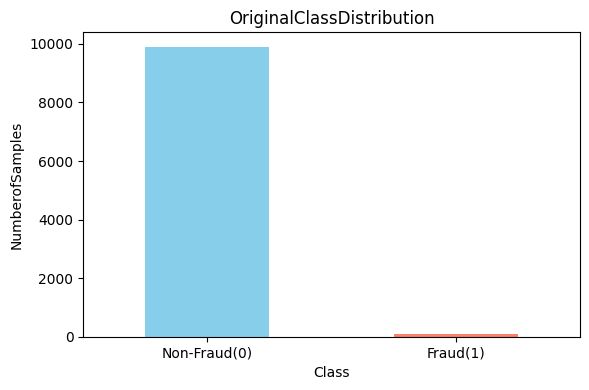


ClassDistributionAfterRandomUndersampling:
Class
0.0    100
1.0    100
Name: count, dtype: int64


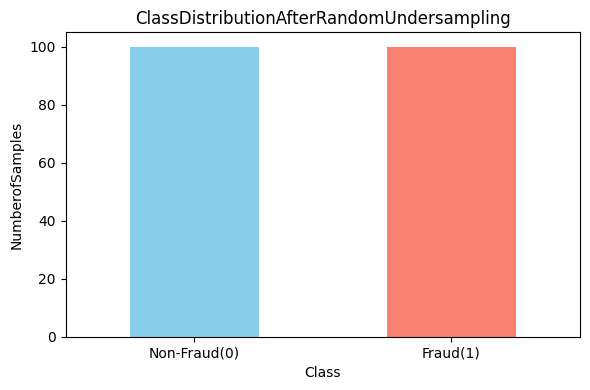

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler

#SimulateCreditCardFraudDetectionDatasetwithImbalance
np.random.seed(42)
num_samples=10000
num_fraud=int(num_samples*0.01) #1%fraudulenttransactions
num_non_fraud=num_samples-num_fraud
#Featuresfornon-fraudulenttransactions
features_non_fraud=np.random.rand(num_non_fraud,28)
target_non_fraud=np.zeros(num_non_fraud)
#Featuresforfraudulenttransactions
features_fraud=np.random.rand(num_fraud,28)*2 #Assumefraudulenttransactionsmightdifferinscale
target_fraud=np.ones(num_fraud)
#Combinefeaturesandtargets
X=np.vstack((features_non_fraud,features_fraud))
y=np.hstack((target_non_fraud,target_fraud))
#Shufflethedata
indices=np.arange(num_samples)
np.random.shuffle(indices)
X=X[indices]
y=y[indices]
#CreateDataFrame
df=pd.DataFrame(X,columns=[f'V{i}'for i in range(1,29)])
df['Class']=y
#VisualizeClassImbalance
print("OriginalClassDistribution:")
print(df['Class'].value_counts())
plt.figure(figsize=(6,4))
df['Class'].value_counts().plot(kind='bar',color=['skyblue','salmon'])
plt.title('OriginalClassDistribution')
plt.xlabel('Class')
plt.ylabel('NumberofSamples')
plt.xticks(ticks=[0,1],labels=['Non-Fraud(0)','Fraud(1)'],rotation=0)
plt.tight_layout()
plt.show()
X=df.drop('Class',axis=1)
y=df['Class']
rus=RandomUnderSampler(random_state=42)
X_resampled,y_resampled=rus.fit_resample(X,y)
#CreateBalancedDataFrame
df_resampled=pd.DataFrame(X_resampled,columns=X.columns)
df_resampled['Class']=y_resampled
#VisualizeClassDistributionAfterUndersampling
print("\nClassDistributionAfterRandomUndersampling:")
print(df_resampled['Class'].value_counts())
plt.figure(figsize=(6,4))
df_resampled['Class'].value_counts().plot(kind='bar',color=['skyblue','salmon'])
plt.title('ClassDistributionAfterRandomUndersampling')
plt.xlabel('Class')
plt.ylabel('NumberofSamples')
plt.xticks(ticks=[0,1],labels=['Non-Fraud(0)','Fraud(1)'],rotation=0)
plt.tight_layout()
plt.show()